<center><b>Programming in Finance</b></center>
<div align="center">Groupwork by Gustavo Baldaia and Pedro Castro</div>
<div align="center">January 2023</div>

### Asset Prices and Returns

We start by importing some standard libraries, as well as **yahoo_fin**, since it gives access to updated information on financial assets.

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
import math
import seaborn
import statsmodels as st
from yahoo_fin.stock_info import get_data
from statsmodels.graphics.tsaplots import plot_acf
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import scipy.stats as scs
import matplotlib.pyplot as ptl
import matplotlib.mlab as mlab

If some of the libraries is missing:
#!pip install yahoo_fin
#!pip install sklearn



In [2]:
#List with the tickers of the selected assets
tickers = ['AMZN','PLD','KO','IBM','DIS','GC=F','NCLH','VTI','VOO','QQQ']

In [3]:
#List with the names of the selected assets
instruments = ['Amazon Stock', 'Prologis Stock', 'Coca-Cola Stock',
               'IBM Stock', 'Disney Stock','Gold Futures 23 Feb', 
               'Norwegian Cruise Line Stock','Vanguard Stock Index Fund', 
               'Vanguard 500 Index Fund','Invesco NASDAQ-100 Fund']

The chosen assets were the following:

In [4]:
for ric, name in zip(tickers, instruments):
    print('{:6s} | {}'.format(ric, name))

AMZN   | Amazon Stock
PLD    | Prologis Stock
KO     | Coca-Cola Stock
IBM    | IBM Stock
DIS    | Disney Stock
GC=F   | Gold Futures 23 Feb
NCLH   | Norwegian Cruise Line Stock
VTI    | Vanguard Stock Index Fund
VOO    | Vanguard 500 Index Fund
QQQ    | Invesco NASDAQ-100 Fund


From the following code we retrive close price of every asset in one dataframe for a period of 10 years (2013-2023).

In [5]:
prices = pd.DataFrame()

for names in tickers:
    temp = get_data(names, start_date="01/01/2013", end_date="01/01/2023", index_as_date = True, interval="1d")

    prices[names] = temp['close']

prices

,AMZN,PLD,KO,IBM,DIS,GC=F,NCLH,VTI,VOO,QQQ
2013-01-02,12.865500,37.349998,37.599998,187.715103,51.099998,1687.900024,NaN,75.139999,133.600006,67.199997
2013-01-03,12.924000,37.400002,37.599998,186.682602,51.209999,1673.699951,NaN,75.029999,133.479996,66.849998
2013-01-04,12.957500,37.709999,37.660000,185.458893,52.189999,1648.099976,NaN,75.410004,134.039993,66.629997
2013-01-07,13.423000,37.959999,37.299999,184.646271,50.970001,1645.500000,NaN,75.209999,133.679993,66.650002
2013-01-08,13.319000,37.840000,37.040001,184.388138,50.759998,1661.500000,NaN,75.010002,133.279999,66.519997
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,85.250000,113.620003,63.820000,141.649994,88.010002,1795.900024,13.00,191.419998,351.869995,267.359985
2022-12-27,83.040001,113.290001,64.209999,142.419998,86.370003,1814.800049,12.54,190.619995,350.470001,263.579987
2022-12-28,81.820000,110.449997,63.570000,140.020004,84.169998,1807.900024,12.14,188.220001,346.170013,260.100006
2022-12-29,84.180000,113.970001,63.950001,141.059998,87.180000,1819.500000,12.47,191.679993,352.309998,266.440002


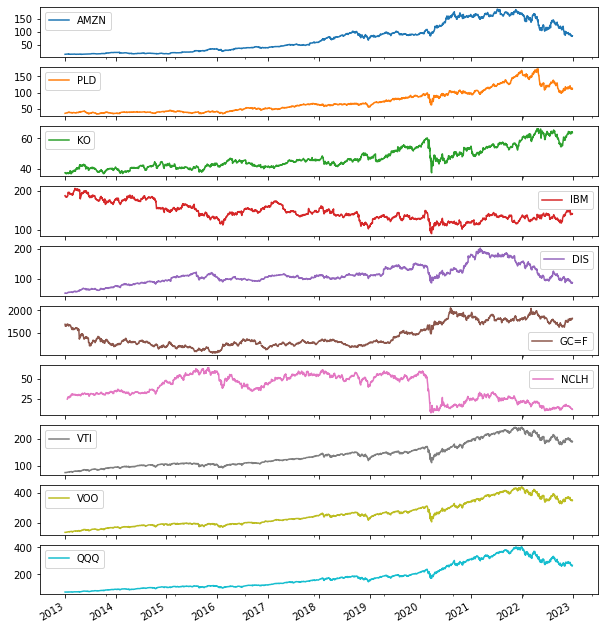

In [6]:
#Plotting the prices evolution over time

prices.plot(figsize=(10, 12), subplots=True);

In [7]:
#Calculation of daily returns in price

returns = prices.copy()

tickers_r = prices.columns.values
tickers_r

for column in tickers_r:
    returns[column] = (prices[column].pct_change()).round(3)
returns.head()

,AMZN,PLD,KO,IBM,DIS,GC=F,NCLH,VTI,VOO,QQQ
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.005,0.001,0.000,-0.006,0.002,-0.008,NaN,-0.001,-0.001,-0.005
2013-01-04,0.003,0.008,0.002,-0.007,0.019,-0.015,NaN,0.005,0.004,-0.003
2013-01-07,0.036,0.007,-0.010,-0.004,-0.023,-0.002,NaN,-0.003,-0.003,0.000
2013-01-08,-0.008,-0.003,-0.007,-0.001,-0.004,0.010,NaN,-0.003,-0.003,-0.002


To measure asset returns we will use logarythmic returns.

In [8]:
#Log returns from each asset

rets = np.log(prices / prices.shift(1))
rets = rets.round(3)
rets.head()

,AMZN,PLD,KO,IBM,DIS,GC=F,NCLH,VTI,VOO,QQQ
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.005,0.001,0.000,-0.006,0.002,-0.008,NaN,-0.001,-0.001,-0.005
2013-01-04,0.003,0.008,0.002,-0.007,0.019,-0.015,NaN,0.005,0.004,-0.003
2013-01-07,0.035,0.007,-0.010,-0.004,-0.024,-0.002,NaN,-0.003,-0.003,0.000
2013-01-08,-0.008,-0.003,-0.007,-0.001,-0.004,0.010,NaN,-0.003,-0.003,-0.002


Next we are computing the standard returns with respect to the first observation at each point in time (cummulative returns).

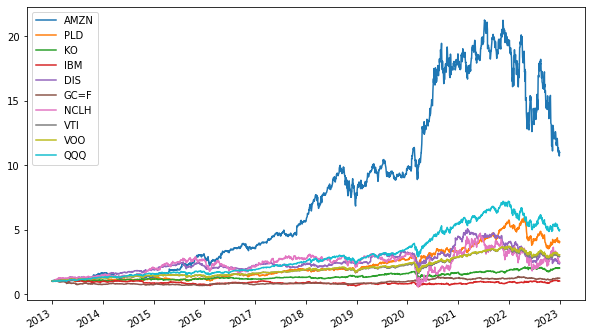

In [9]:
#Plotting the daily returns over time
returns.cumsum().apply(np.exp).plot(figsize=(10, 6)); 

### Normality

Some models assume that asset returns follow a normal distribution. We will now test that hypothesis.

In [10]:
rets.isnull().sum()

AMZN     1
PLD      1
KO       1
IBM      1
DIS      1
GC=F     7
NCLH    13
VTI      1
VOO      1
QQQ      1
dtype: int64

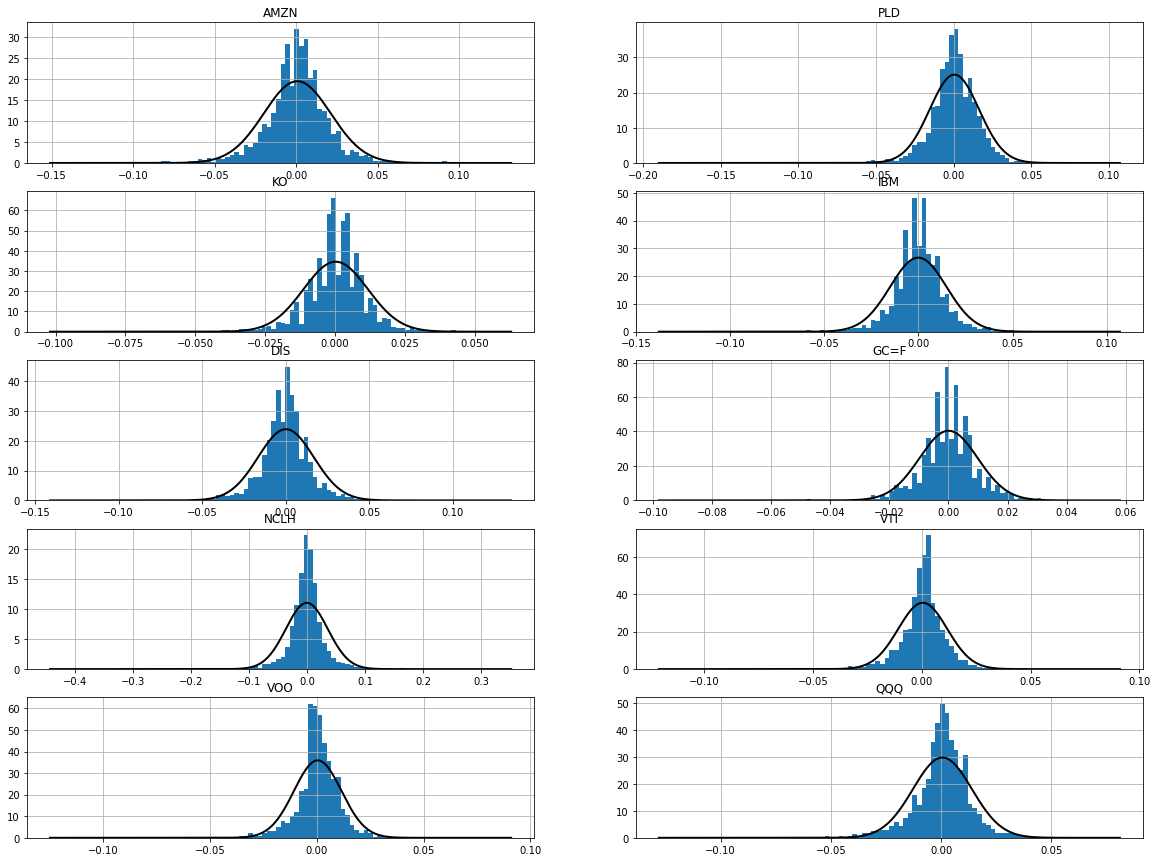

In [11]:
#Removing the NA from dataset to plot histograms with the normal distribution curve associated

rets_h = rets.dropna()

# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 15),subplot_kw={'aspect':'auto'},squeeze=False)

for i,col in enumerate(rets_h.columns):
    rets_h[col].hist(ax=axs[i//2][i%2],bins=100,density=True)
    mu, std = scs.norm.fit(rets_h[col])
    xmin, xmax = axs[i//2][i%2].get_xlim()
    #x = np.linspace(xmin, xmax, 100)
    x = np.linspace(rets_h[col].min(), rets_h[col].max(), 10000)
    p = scs.norm.pdf(x, mu, std)
    axs[i//2][i%2].plot(x, p, 'k', linewidth=2)
    axs[i//2][i%2].set_title(col)

plt.show()

**It is obvious from the graphs that returns are not normal:** they are much more common around the mean than the normal function suggests, with the amount of slight positive or negative returns overstated.

We confirm that fact with the scipy stats Normal Test. This function tests the null hypothesis that a sample comes from a normal distribution.

* If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.

* If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

The p-value of every asset is aproximately zero, so we reject the null hypothesis: **the distribution of returns is not normal.**

In [12]:
for names in tickers:
    log_data = np.array(rets[names].dropna())
    print('\nResults for symbol {}'.format(names))
    print(scs.normaltest(log_data))


Results for symbol AMZN
NormaltestResult(statistic=345.1809081681512, pvalue=1.1089658234861788e-75)

Results for symbol PLD
NormaltestResult(statistic=754.160714084942, pvalue=1.7221925347486057e-164)

Results for symbol KO
NormaltestResult(statistic=718.256819741332, pvalue=1.0777382544858521e-156)

Results for symbol IBM
NormaltestResult(statistic=677.2715061810895, pvalue=8.557778817748507e-148)

Results for symbol DIS
NormaltestResult(statistic=500.73753121814593, pvalue=1.8459785702746958e-109)

Results for symbol GC=F
NormaltestResult(statistic=471.4279876087717, pvalue=4.2728060842897474e-103)

Results for symbol NCLH
NormaltestResult(statistic=1000.9347481107256, pvalue=4.464584787749587e-218)

Results for symbol VTI
NormaltestResult(statistic=789.7933014772764, pvalue=3.15183636609364e-172)

Results for symbol VOO
NormaltestResult(statistic=812.394842229862, pvalue=3.896740151475832e-177)

Results for symbol QQQ
NormaltestResult(statistic=525.745808060059, pvalue=6.850911192

### Optimal Portfolio & Efficient Frontier

In [13]:
noa = len(tickers)  
rets_mean = rets.mean() * 252       # Annualized mean of returns for each asset
rets_cov_matrix = rets.cov() * 252  # Annualized covariance matrix for the portfolio of assets
print (rets_mean)

AMZN    0.188324
PLD     0.107428
KO      0.053063
IBM    -0.029936
DIS     0.052162
GC=F    0.011943
NCLH   -0.071727
VTI     0.091509
VOO     0.095814
QQQ     0.140968
dtype: float64


In [14]:
print(rets_cov_matrix)

          AMZN       PLD        KO       IBM       DIS      GC=F      NCLH  \
AMZN  0.105816  0.030510  0.014495  0.022872  0.034008  0.000273  0.049949   
PLD   0.030510  0.063599  0.024174  0.025790  0.026936  0.003562  0.044398   
KO    0.014495  0.024174  0.033338  0.020014  0.021421  0.001325  0.032534   
IBM   0.022872  0.025790  0.020014  0.056219  0.026651  0.000550  0.049874   
DIS   0.034008  0.026936  0.021421  0.026651  0.070028 -0.000710  0.078655   
GC=F  0.000273  0.003562  0.001325  0.000550 -0.000710  0.024521 -0.001906   
NCLH  0.049949  0.044398  0.032534  0.049874  0.078655 -0.001906  0.329365   
VTI   0.035191  0.030149  0.019202  0.026499  0.032072  0.000605  0.055235   
VOO   0.034808  0.030025  0.019568  0.026423  0.031401  0.000487  0.052301   
QQQ   0.050412  0.031289  0.017919  0.026249  0.033098  0.000751  0.052848   

           VTI       VOO       QQQ  
AMZN  0.035191  0.034808  0.050412  
PLD   0.030149  0.030025  0.031289  
KO    0.019202  0.019568  0.01

Since normality of returns has been rejected, we will graphically demonstrate the efficient frontier of the portfolio by using a 5000-step Montecarlo simulation.
The points higher up the graph, in red tones, have higher Sharpe ratios. That means they have a higher return per unit of risk. It is not efficient to hold any portfolio below this line.

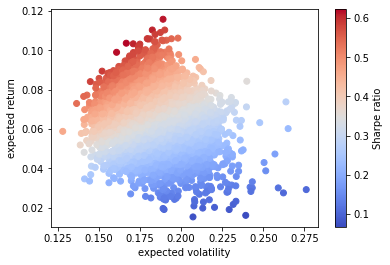

In [15]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

prets = []
pvols = []
for p in range (5000):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)       #Guarantees that sum of the weights is equal to 1
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [16]:
# Portfolio Optimization

import scipy.optimize as sco

def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  # We look into minimize because the optimizing function in scipy is programmed to minimize

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  # Sum of every weight equals 1

bnds = tuple((0, 1) for x in range(noa))  # Each weight individually is between 0 and 1  

eweights = np.array(noa * [1. / noa,])  
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [17]:
min_func_sharpe(eweights)

opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)    
s_weights = opts['x'].round(3)

print('Ticker',' Weight in Optimal Portfolio')
print(36 * '-')
for ric, value in zip(tickers, s_weights):
    print('{:6s} | {}'.format(ric, value))

Ticker  Weight in Optimal Portfolio
------------------------------------
AMZN   | 0.18
PLD    | 0.074
KO     | 0.0
IBM    | 0.0
DIS    | 0.0
GC=F   | 0.106
NCLH   | 0.0
VTI    | 0.0
VOO    | 0.0
QQQ    | 0.64


In [18]:
port_ret(opts['x']) / port_vol(opts['x'])  # Maximum Sharpe ratio

0.6843965776067872

In [19]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  
v_weights = optv['x'].round(3)

print('Ticker',' Weight in Min Variance Portfolio')
print(40 * '-')
for ric, value in zip(tickers, v_weights):
    print('{:6s} | {}'.format(ric, value))

Ticker  Weight in Min Variance Portfolio
----------------------------------------
AMZN   | 0.005
PLD    | 0.0
KO     | 0.204
IBM    | 0.036
DIS    | 0.002
GC=F   | 0.511
NCLH   | 0.0
VTI    | 0.111
VOO    | 0.131
QQQ    | 0.0


In [20]:
print(port_ret(optv['x']) / port_vol(optv['x']))  # Sharpe ratio for the portfolio with lowest volatility

0.34786433195388183


Next we will repeat the procedure for the assets with only 1 year horizon.

In [21]:
noa = len(tickers)  
rets_mean_1y = rets.tail(252).mean() * 252       # Annualized mean of returns for each asset
rets_cov_matrix_1y = rets.tail(252).cov() * 252  # Annualized covariance matrix for the portfolio of assets
print (rets_mean_1y)
print(rets_cov_matrix_1y)

AMZN   -0.698
PLD    -0.405
KO      0.078
IBM     0.042
DIS    -0.589
GC=F    0.008
NCLH   -0.540
VTI    -0.242
VOO    -0.214
QQQ    -0.404
dtype: float64
          AMZN       PLD        KO       IBM       DIS      GC=F      NCLH  \
AMZN  0.250316  0.090150  0.035506  0.038878  0.124868  0.008542  0.202509   
PLD   0.090150  0.118452  0.036127  0.036472  0.056855  0.008123  0.104058   
KO    0.035506  0.036127  0.039069  0.022969  0.029167  0.002263  0.037689   
IBM   0.038878  0.036472  0.022969  0.058126  0.029505  0.004128  0.061412   
DIS   0.124868  0.056855  0.029167  0.029505  0.139305  0.004398  0.171360   
GC=F  0.008542  0.008123  0.002263  0.004128  0.004398  0.024045  0.005500   
NCLH  0.202509  0.104058  0.037689  0.061412  0.171360  0.005500  0.565417   
VTI   0.099597  0.059990  0.028050  0.032143  0.070522  0.004353  0.122739   
VOO   0.095797  0.058478  0.028236  0.032064  0.067324  0.003934  0.114936   
QQQ   0.134078  0.069478  0.030121  0.035402  0.088944  0.004042 

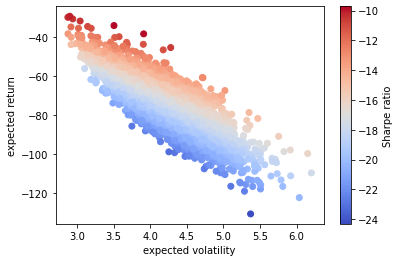

In [22]:
def port_ret_1y(weights):
    return np.sum(rets_mean_1y * weights) * 252

def port_vol_1y(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets_cov_matrix_1y * 252, weights)))

prets1y = []
pvols1y = []
for p in range (5000):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)       #Guarantees that sum of the weights is equal to 1
    prets1y.append(port_ret_1y(weights))  
    pvols1y.append(port_vol_1y(weights))  
prets1y = np.array(prets1y)
pvols1y = np.array(pvols1y)

plt.scatter(pvols1y, prets1y, c=prets1y / pvols1y,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [23]:
# Portfolio Optimization

def min_func_sharpe_1y(weights):  
    return -port_ret_1y(weights) / port_vol_1y(weights)  # We look into minimize because the optimizing function in scipy is programmed to minimize

cons1y = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  # Sum of every weight equals 1

bnds1y = tuple((0, 1) for x in range(noa))  # Each weight individually is between 0 and 1  

min_func_sharpe(eweights)

opts_1y = sco.minimize(min_func_sharpe_1y, eweights,
                    method='SLSQP', bounds=bnds1y,
                    constraints=cons1y)    
s_weights_1y = opts['x'].round(3)

print('Ticker',' Weight in Optimal Portfolio')
print(36 * '-')
for ric, value in zip(tickers, s_weights_1y):
    print('{:6s} | {}'.format(ric, value))

Ticker  Weight in Optimal Portfolio
------------------------------------
AMZN   | 0.18
PLD    | 0.074
KO     | 0.0
IBM    | 0.0
DIS    | 0.0
GC=F   | 0.106
NCLH   | 0.0
VTI    | 0.0
VOO    | 0.0
QQQ    | 0.64


In [24]:
port_ret_1y(opts_1y['x']) / port_vol_1y(opts_1y['x'])  # Maximum Sharpe ratio

6.274591665496581

In [25]:
optv_1y = sco.minimize(port_vol_1y, eweights,
                    method='SLSQP', bounds=bnds1y,
                    constraints=cons1y)  
v_weights_1y = optv['x'].round(3)

print('Ticker',' Weight in Min Variance Portfolio')
print(40 * '-')
for ric, value in zip(tickers, v_weights_1y):
    print('{:6s} | {}'.format(ric, value))

Ticker  Weight in Min Variance Portfolio
----------------------------------------
AMZN   | 0.005
PLD    | 0.0
KO     | 0.204
IBM    | 0.036
DIS    | 0.002
GC=F   | 0.511
NCLH   | 0.0
VTI    | 0.111
VOO    | 0.131
QQQ    | 0.0


In [26]:
print(port_ret_1y(optv_1y['x']) / port_vol_1y(optv_1y['x']))  # Sharpe ratio for the portfolio with lowest volatility

2.779288087313555


As we can see, if we consider only the last 252 observations, covering the entire period of 2022, almost the entire portfolio has negative returns. We should not conduct the analysis with such a short term timeframe, since it makes the price very vulnerable to economical and financial cycles.

We will now show the portfolio's efficient frontier, with data for the last 10 years.

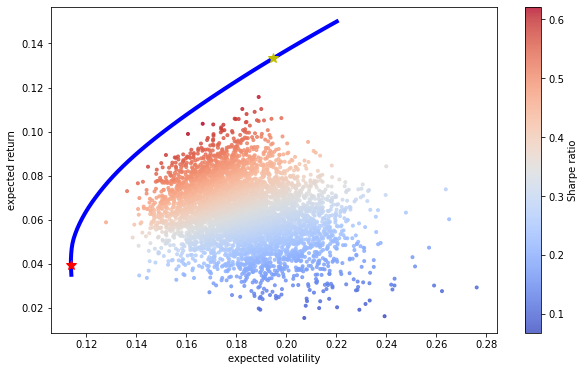

In [27]:
# Efficient Frontier

cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

bnds = tuple((0, 1) for x in weights)

trets = np.linspace(0.035, 0.15, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

opts['x'], optv['x']

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=10.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=10.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

### Value at Risk

Firstly, we generate the optimal portfolio Index, with the maximum Sharpe Ratio, with price Index and returns.

In [28]:
ptl_opt = opts['x'].round(3)
ptl_opt

array([0.18 , 0.074, 0.   , 0.   , 0.   , 0.106, 0.   , 0.   , 0.   ,
       0.64 ])

In [29]:
diffs_r = returns*ptl_opt

opt_port = pd.DataFrame()

#Adding the retuns of the optimal portfolio
opt_port['Return'] = diffs_r.sum(axis=1).cumsum().apply(np.exp)
opt_port

,Return
2013-01-02,1.000000
2013-01-03,0.996931
2013-01-04,0.994563
2013-01-07,1.001335
2013-01-08,0.999452
...,...
2022-12-23,4.908567
2022-12-27,4.846642
2022-12-28,4.782637
2022-12-29,4.896771


In [30]:
#Adding the price Index with a base value of 100 of the optimal portfolio
opt_port['Value'] = 0

for i in range(0,len(opt_port)):
    if i == 0:
        opt_port['Value'][i] = 100
    else:
         opt_port['Value'][i] = 100*opt_port['Return'][i]
            
opt_port

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7404/2045029034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opt_port['Value'][i] = 100
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7404/2045029034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opt_port['Value'][i] = 100*opt_port['Return'][i]


,Return,Value
2013-01-02,1.000000,100
2013-01-03,0.996931,99
2013-01-04,0.994563,99
2013-01-07,1.001335,100
2013-01-08,0.999452,99
...,...,...
2022-12-23,4.908567,490
2022-12-27,4.846642,484
2022-12-28,4.782637,478
2022-12-29,4.896771,489


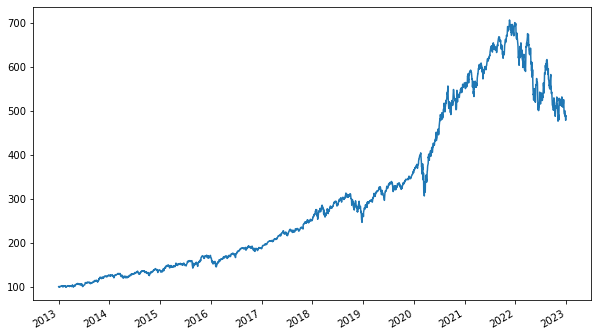

In [31]:
opt_port['Value'].plot(figsize=(10, 6)); 

**Historical Approach** simply collects the Value at Risk from looking at the return obtained at a certain percentile. We choose alpha values that span from 0.01% to 10%.

In [32]:
# Historical Approach (covering the last year of trade)
import statsmodels.api as sm

port_rets = np.log(opt_port['Value']/ opt_port['Value'].shift(1))

port_rets

2013-01-02         NaN
2013-01-03   -0.010050
2013-01-04    0.000000
2013-01-07    0.010050
2013-01-08   -0.010050
                ...   
2022-12-23    0.004090
2022-12-27   -0.012320
2022-12-28   -0.012474
2022-12-29    0.022752
2022-12-30   -0.002047
Name: Value, Length: 2518, dtype: float64

In [33]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(port_rets.head(252)*100, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk (%)'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level Value-at-Risk (%)
---------------------------------
           99.99            2.954
           99.90            2.942
           99.00            1.980
           97.50            1.757
           95.00            1.005
           90.00            0.975


**Parametric approaches** estimate risk by fitting probability curves to the data and then inferring the risk measure from the fitted curves. We assume a normal distibution for portfolio returns and collect correlation matrix and annual volatility from the 10 years of data.

In [34]:
# Analytical (Parametric) Approach

# Risk horizon
t = 252
h = 1/t  # 1-day

alpha=0.05

# asset weights in portfolio
s_weights

array([0.18 , 0.074, 0.   , 0.   , 0.   , 0.106, 0.   , 0.   , 0.   ,
       0.64 ])

In [35]:
# annual volatilities
sigma = rets.std(axis=0) * np.sqrt(t)

#correlation matrix
corr_matrix = rets.corr()
corr_matrix

,AMZN,PLD,KO,IBM,DIS,GC=F,NCLH,VTI,VOO,QQQ
AMZN,1.000000,0.371909,0.244047,0.296545,0.395069,0.005362,0.267153,0.606903,0.607921,0.732339
PLD,0.371909,1.000000,0.525003,0.431312,0.403614,0.090190,0.306197,0.670690,0.676402,0.586299
KO,0.244047,0.525003,1.000000,0.462289,0.443340,0.046329,0.309875,0.589992,0.608877,0.463777
IBM,0.296545,0.431312,0.462289,1.000000,0.424743,0.014815,0.365740,0.626975,0.633124,0.523146
DIS,0.395069,0.403614,0.443340,0.424743,1.000000,-0.017125,0.517196,0.679909,0.674131,0.591040
GC=F,0.005362,0.090190,0.046329,0.014815,-0.017125,1.000000,-0.021190,0.021667,0.017642,0.022659
NCLH,0.267153,0.306197,0.309875,0.365740,0.517196,-0.021190,1.000000,0.538777,0.516614,0.434205
VTI,0.606903,0.670690,0.589992,0.626975,0.679909,0.021667,0.538777,1.000000,0.992571,0.923362
VOO,0.607921,0.676402,0.608877,0.633124,0.674131,0.017642,0.516614,0.992571,1.000000,0.924693
QQQ,0.732339,0.586299,0.463777,0.523146,0.591040,0.022659,0.434205,0.923362,0.924693,1.000000


In [36]:
analytical_VaR = -100*(np.sqrt((sigma * s_weights) @ corr_matrix @ (sigma * s_weights).T)*scs.norm.ppf(alpha)*np.sqrt(h))
print(np.round(analytical_VaR,4))

2.0186


For the **Monte Carlo simulation** we transform a random sample from a uniform variable 𝑈 into a random sample from a distribution with a given cumulative distribution function 𝐹. 
We run 𝑁 simulations of the portfolio’s risk factors for the end of VaR holding period. For each simulation, revalue the portfolio and calculate 𝑃&𝐿, and estimate VaR as the relevant order statistic.

In [37]:
# Monte Carlo Simulation

import numpy.random as npr  
import statistics
from numpy.linalg import cholesky, LinAlgError, eigh

# number of simulations
N=10000

# Generating random numbers from standard uniform distribution (array N x 10)
U = scs.uniform(0,1).rvs(size=(N,10))

# Transforming sample from uniform distribution to a sample drawn from standard normal distribution
x = scs.norm.ppf(U)

# Generating correlated random numbers by means of Cholesky decomposition
L = cholesky(corr_matrix)
y = L @ x.T

# Generating PnL
PnL = (((sigma * s_weights) * np.sqrt(h)) @ y)

# Calculate VaR
VaR_MC = 100*np.percentile(PnL, q=(1-alpha)*100)
print(VaR_MC)

2.0384496063403574


In [38]:
# Error
print("Error rate:", '{:.4%}'.format(round((VaR_MC/analytical_VaR)-1,6)))

Error rate: 0.9816%


### Moving Average & Forecasting

The moving average of returns is an important indicator when conducting technical analysis on prices.

In [39]:
#Calculating moving averages of Optimal portfolio with a 20 and 100 window periods

MA20_opt_port = opt_port['Value'].rolling(window=20).mean()
MA100_opt_port = opt_port['Value'].rolling(window=100).mean()

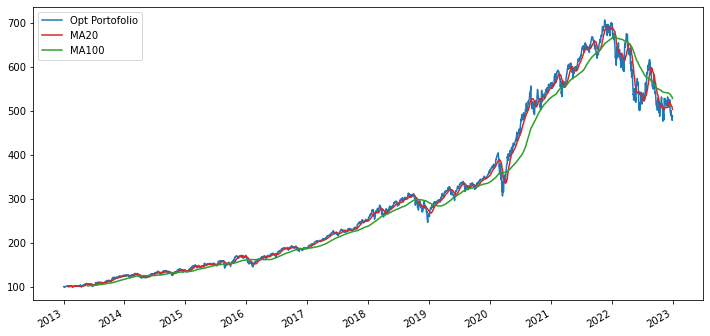

In [40]:
#Ploting the value of the Optimal Portfolio with the Moving Averages

fig, ax = plt.subplots(figsize=(12,6))
fig.autofmt_xdate()
ax.plot(opt_port.index, opt_port['Value'], label='Opt Portofolio', color='tab:blue')
ax.plot(opt_port.index, MA20_opt_port, label='MA20', color='tab:red')
ax.plot(opt_port.index, MA100_opt_port, label='MA100', color='tab:green')
ax.legend()

In [41]:
#Calculating autocorrelation from Opt Port Index Value

opt_port['Value'].autocorr()

0.9996077279756763

The autocorrelation value for the daily price Index of the Optimal Portfolio is very high, with a value of almost 1.

In [42]:
#Calculating autocorrelation from Opt Port Index Returns

opt_port['Return'].autocorr()

0.9996111971330377

The autocorrelation value for the daily Retuns of the Optimal Portfolio is very low and actually negative, with a value very close to 0.

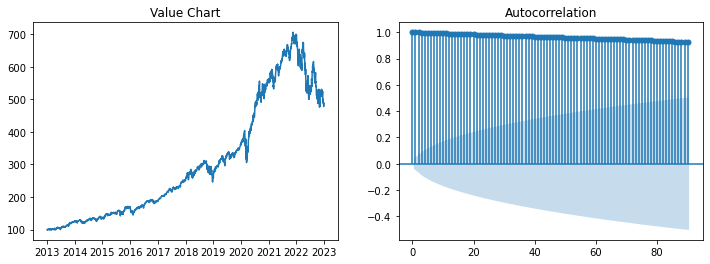

In [43]:
#Ploting the ACF values for a total of 90 lags

fig = plt.figure(figsize=(12,4))

graph1 = fig.add_subplot(121)
graph1.set_title('Value Chart')
graph1.plot(opt_port['Value'])

graph2 = fig.add_subplot(122)
plot_acf(opt_port['Value'], lags=90, alpha=0.05,ax=graph2)

plt.show()

From the ACF graph is possible to check the high correlation of the data in the first 90 lags.

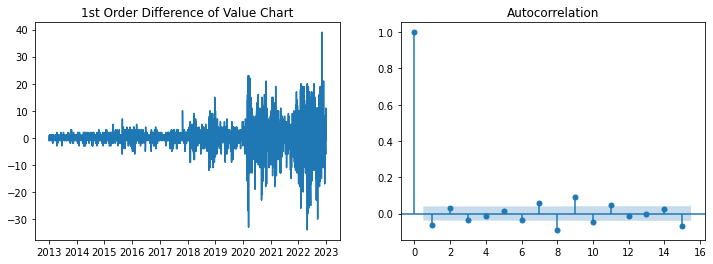

In [44]:
#Ploting the ACF values for the first order difference total of 15 lags

fig = plt.figure(figsize=(12,4))

graph1 = fig.add_subplot(121)
graph1.set_title('1st Order Difference of Value Chart')
graph1.plot(opt_port['Value'].diff())

graph2 = fig.add_subplot(122)
plot_acf(opt_port.diff().dropna()['Value'], lags=15, alpha=0.05,ax=graph2)

plt.show()

With the first order difference of the Prices Index, the autocorrelation values are significant lower, with the first lag autocorrelation value very close to the statistically insignificant area. It is also possible to verify that the data is ranging the 0 mean value, indicating the stationarity of the data.

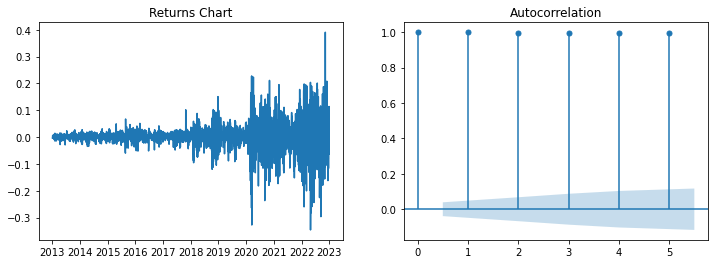

In [45]:
#Ploting the ACF values for a total of 5 lags

fig = plt.figure(figsize=(12,4))

graph1 = fig.add_subplot(121)
graph1.set_title('Returns Chart')
graph1.plot(opt_port['Return'].diff())

graph2 = fig.add_subplot(122)
plot_acf(opt_port['Return'], lags=5, alpha=0.05,ax=graph2)

plt.show()


The Returns present as seen before an low autocorrelation value, with the first lag autocorrelation value very close to the statistically insignificant area. It is also possible to verify that the data is ranging the 0 mean value, indicating the stationarity of the data.

Checking the stationarity of the optimal portfolio Value and Return using the ***Augmented Dickey-Fuller*** test

In [46]:
res = adfuller(opt_port['Value'])
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.672327
p-value: 0.853788
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


As the p-value is > alpha we can't ***reject the null hypothesis that the series is a non-stationarity***.

In [47]:
res = adfuller(opt_port.diff().dropna()['Value'])
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.565343
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


As the p-value is < alpha we can ***reject the null hypothesis that the series is a non-stationarity***. We can assume the stationarity of the first order difference of the Price Index Time Series.

In [48]:
res = adfuller(opt_port['Return'])
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.673682
p-value: 0.853449
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


As the p-value is < alpha we can ***reject the null hypothesis that the series is a non-stationarity***. We can assumne that the Returns series is stationary.

**Testing different parameters for the ARIMA model, (p, d, q) to check the best model selection for the data.**

*Separating the data into a train and test dataset.*

- Deleting the last 120 observations from the original data, to generate the tarining set 

*&*

- Selecting the last 120 observations for the testing set.


In [49]:
train_data = pd.DataFrame({
    'Value' : opt_port['Value'][1:len(opt_port['Value'])-120]})

test_data = pd.DataFrame({
    'Value' : opt_port['Value'][len(opt_port['Value'])-120:]})

*Selecting the range for each of the parameters to test the models fitability*

In [50]:
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)

**Checking the MSE (Mean Squared Error) for each of the possible combinations**

In [51]:
Min_MSE = []
Order = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train_data.values, order=order).fit()
            predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
            error = mean_squared_error(test_data, predictions)
            #print('ARIMA%s MSE=%.3f' % (order,error))
            if not Min_MSE:
                Min_MSE = error
                Order = order
            elif error < Min_MSE:
                Min_MSE = error
                Order = order

print('ARIMA%s MSE=%.3f' % (Order,Min_MSE))

ARIMA(1, 0, 1) MSE=1434.995


In [52]:
#Checking the statistical summary for ARIMA based on MSE
mymodel = ARIMA(opt_port['Value'], order = Order)  
modelfit_best = mymodel.fit()  
print(modelfit_best.summary())  

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 2518
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7636.255
Date:                Wed, 18 Jan 2023   AIC                          15280.511
Time:                        13:15:19   BIC                          15303.835
Sample:                             0   HQIC                         15288.975
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.7506    122.382      2.482      0.013      63.887     543.614
ar.L1          0.9996      0.000   2519.163      0.000       0.999       1.000
ma.L1         -0.0597      0.010     -5.783      0.0

**Predicting the last 2 months of daily observations and plotting them against the actual values**

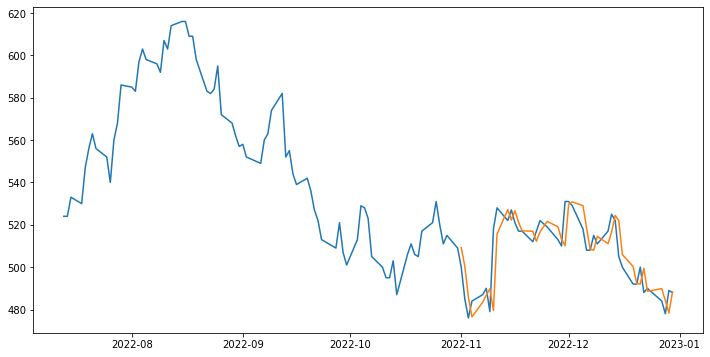

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(opt_port['Value'][-120:])
plt.plot(modelfit_best.predict(start='2022-11-01', end='2022-12-30',dynamic = False))

In [54]:
predict = modelfit_best.predict(start='2022-11-01', end='2022-12-30',dynamic = False)

results_p = pd.DataFrame({
    'Value' : opt_port['Value'][len(opt_port['Value'])-42:],
    'Predict': predict
    })

In [55]:
results_p['Error'] = round(results_p['Value'] -results_p['Predict'],2)
results_p['Error Rel'] = round((results_p['Error'] / results_p['Value'])*100,2)
results_p

,Value,Predict,Error,Error Rel
2022-11-01,500,509.259593,-9.26,-1.85
2022-11-02,485,500.475134,-15.48,-3.19
2022-11-03,476,485.851951,-9.85,-2.07
2022-11-04,484,476.519949,7.48,1.55
2022-11-07,487,483.482542,3.52,0.72
2022-11-08,490,486.717819,3.28,0.67
2022-11-09,479,489.730675,-10.73,-2.24
2022-11-10,518,479.571202,38.43,7.42
2022-11-11,528,515.622329,12.38,2.34
2022-11-14,522,527.172931,-5.17,-0.99


In the above example, we have now plotted the 'actuals vs fitted' graph and set dynamic = False. As a result, the in-sample lagged values are utilized for forecasting.

Thus, the model gets trained up until the past value makes the following forecast. Therefore, it can create the fitted forecast, and actuals appear preciously delicate.

In the following entry we find the average percentage deviation of the estimate according to the actual data.

In [56]:
percentage = results_p['Error Rel']
round(abs(percentage).mean(),4)

1.4421

<center><i>The end. Thank you for reading!</i></center>